In [1]:
%%capture
!pip3 install tensorflow
!pip3 install tensorflow-datasets
!pip3 install tensorflow_addons

In [2]:
from config import *
from scan_convert import *
from util import *

In [3]:
!python3 ScanConvertTests.py

2021-03-26 12:48:31.344396: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Couldn't resolve host 'metadata'".
2021-03-26 12:48:32.954646: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-03-26 12:48:32.970196: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ffc04352d70 initialized for platform Host (this does not guarantee that XLA will be used). Devic

In [4]:
# Load dataset 
ds = tfds.load('duke_ultrasound', data_dir='gs://tfds-data/datasets')
test_dataset = ds['MARK'].map(process) # Splits: MARK, TRAIN, VALIDATION, TEST, A, B
test_iter = iter(test_dataset)

In [5]:
# Choose next data point
ele = next(test_iter)

In [6]:
# Precompute step
empty_res_image, points_xy, val_rtheta, val_weights = scan_convert_precompute(ele['dtce'], ele, ele['dtce'].shape[0], ele['dtce'].shape[1])

In [7]:
# Dynamic step
t1 = time.perf_counter()
res = scan_convert_scratch(ele['dtce'], empty_res_image, ele, points_xy, val_rtheta, val_weights)
t2 = time.perf_counter() - t1
print(t2)

0.46598025199999427


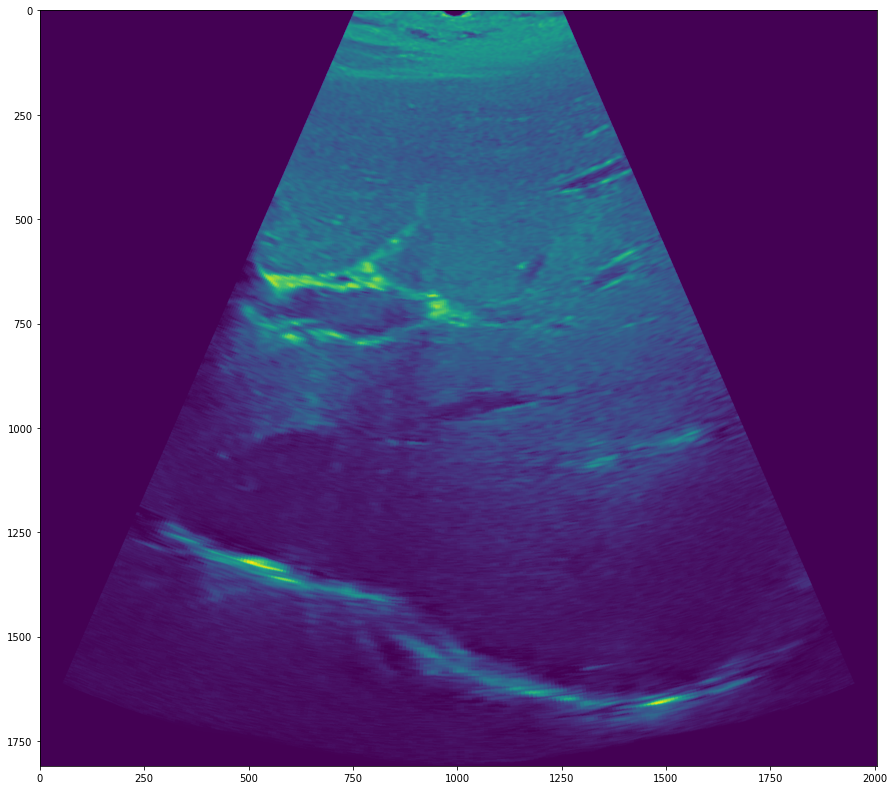

In [8]:
# Plot
plt.figure(figsize=(15,15))
plt.imshow(res)

In [9]:
t3 = time.perf_counter()
res_old = scan_convert_with_image_sparse_warp(ele['dtce'], ele, 17, 5)
t4 = time.perf_counter() - t3
print(t4)

13.264378352000008


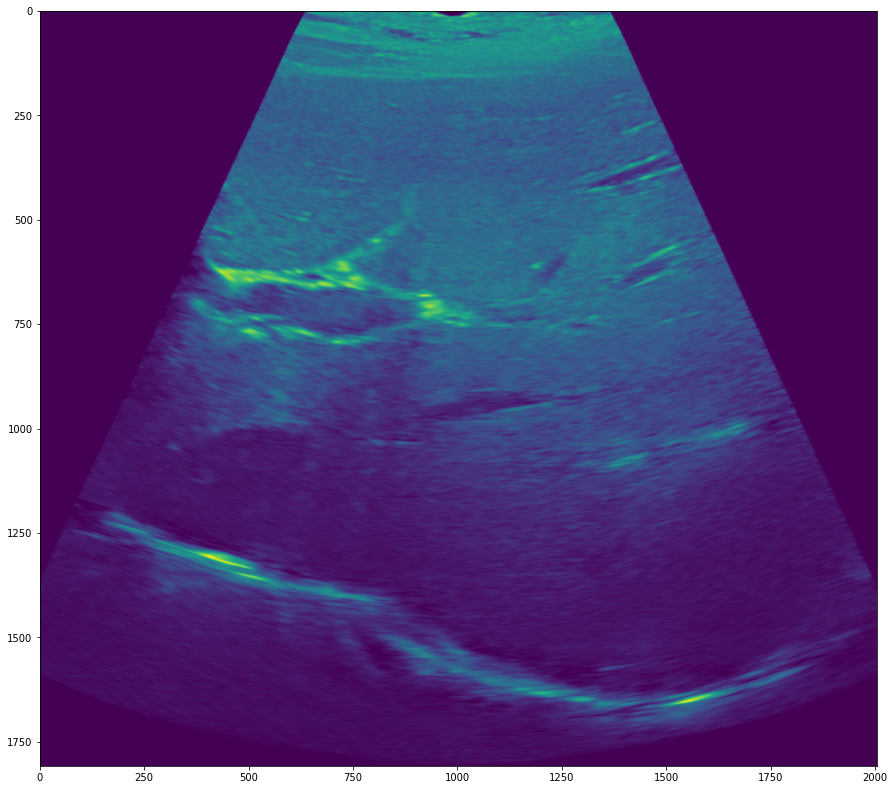

In [10]:
# Plot
plt.figure(figsize=(15,15))
plt.imshow(res_old)